In [1]:
import pandas as pd
import numpy as np

几种数据结构类型   json / dict /map / hashedlist

## DataFrame

In [2]:
# json/dict

data0 = {
    "a":[1, 2, 3],
    "b":[4, 5, 6],
    "c":["bob", "alice", "jack"]
}

In [3]:
pd.DataFrame(data0)

,a,b,c
0,1,4,bob
1,2,5,alice
2,3,6,jack


In [4]:
data = {
    "name":["Alice", "Bob", "Charles", "David", "Eric"],
    "year":[2017, 2017, 2017, 2017, 2017],
    "salary":[40000, 24000, 31000, 20000, 30000],
    "pair":[{"a":1}, {"a":2}, {"a":3}, {"a":4}, {"a":5}]
}

In [5]:
d = pd.DataFrame(data)

In [6]:
d

,name,year,salary,pair
0,Alice,2017,40000,{'a': 1}
1,Bob,2017,24000,{'a': 2}
2,Charles,2017,31000,{'a': 3}
3,David,2017,20000,{'a': 4}
4,Eric,2017,30000,{'a': 5}


## .query(condition)

In [7]:
d.query("salary > 20000")

,name,year,salary,pair
0,Alice,2017,40000,{'a': 1}
1,Bob,2017,24000,{'a': 2}
2,Charles,2017,31000,{'a': 3}
4,Eric,2017,30000,{'a': 5}


In [8]:
d[d.salary > 20000]

,name,year,salary,pair
0,Alice,2017,40000,{'a': 1}
1,Bob,2017,24000,{'a': 2}
2,Charles,2017,31000,{'a': 3}
4,Eric,2017,30000,{'a': 5}


In [9]:
d.salary

0    40000
1    24000
2    31000
3    20000
4    30000
Name: salary, dtype: int64

In [10]:
type(d.salary)

pandas.core.series.Series

In [11]:
d[d.name == "Eric"]

,name,year,salary,pair
4,Eric,2017,30000,{'a': 5}


In [12]:
d.query("name == 'Eric'")

,name,year,salary,pair
4,Eric,2017,30000,{'a': 5}


## 多条件查找

In [13]:
d.query("name == 'Bob' and salary > 20000")

,name,year,salary,pair
1,Bob,2017,24000,{'a': 2}


## 列选择

In [14]:
d = d.filter(items = ["name", "year", "salary"])

In [15]:
d

,name,year,salary
0,Alice,2017,40000
1,Bob,2017,24000
2,Charles,2017,31000
3,David,2017,20000
4,Eric,2017,30000


In [16]:
# 简化写法

d[["name", "salary"]]

,name,salary
0,Alice,40000
1,Bob,24000
2,Charles,31000
3,David,20000
4,Eric,30000


## 模糊查找

In [17]:
d.filter(like = "2", axis = 0)

,name,year,salary
2,Charles,2017,31000


In [18]:
d.filter(like = "y", axis = 1)

,year,salary
0,2017,40000
1,2017,24000
2,2017,31000
3,2017,20000
4,2017,30000


## 分组

In [19]:
df1 = pd.DataFrame({
    "name":["Alice", "Ada", "Mallory", "Mallory", "Billy", "Mallory"],
    "city":["Sydney", "Sydney", "Paris", "Sydney", "Sydney", "Paris"]
})

In [20]:
df1

,name,city
0,Alice,Sydney
1,Ada,Sydney
2,Mallory,Paris
3,Mallory,Sydney
4,Billy,Sydney
5,Mallory,Paris


In [21]:
df1.groupby(["city"]).count()

,name
city,
Paris,2
Sydney,4


In [22]:
# 统计函数
d.describe() # 查看数据的分布

,year,salary
count,5.0,5.000000
mean,2017.0,29000.000000
std,0.0,7615.773106
min,2017.0,20000.000000
25%,2017.0,24000.000000
50%,2017.0,30000.000000
75%,2017.0,31000.000000
max,2017.0,40000.000000


skew：偏度

去掉 outlier（离散值）

[query("salary == 40000") = 32000]  ---直接修改离散值，删掉的话可能会造成很大影响

In [23]:
df2 = pd.DataFrame({
    "key1":["a", "a", "b", "b", "a"],
    "key2":["one", "two", "one", "two", "one"],
    "data1":np.random.randn(5),
    "data2":np.random.randn(5)
})

In [24]:
df2

,key1,key2,data1,data2
0,a,one,3.341158,-0.550685
1,a,two,-1.818676,2.035321
2,b,one,0.217591,-1.111665
3,b,two,-0.230766,1.190660
4,a,one,-0.219911,-0.647958


In [25]:
np.random.randn(5)

array([-0.63780393,  0.63643409, -1.07477362,  0.73059575, -0.67638703])

In [26]:
df2.groupby(["key1"]).mean()

,data1,data2
key1,,
a,0.434190,0.278893
b,-0.006587,0.039498


In [27]:
df2.groupby(["key1", "key2"]).mean()

data1     data2
key1 key2                    
a    one   1.560623 -0.599321
     two  -1.818676  2.035321
b    one   0.217591 -1.111665
     two  -0.230766  1.190660

## 统计函数

mean()

median()

count()

std()

min()

max()

In [28]:
df2.mean()

data1    0.257879
data2    0.183135
dtype: float64

## 如何统计列不同的个数

In [29]:
df2.count()

key1     5
key2     5
data1    5
data2    5
dtype: int64

In [30]:
df2.groupby(["key1"]).count()

,key2,data1,data2
key1,,,
a,3,3,3
b,2,2,2


In [31]:
df2.groupby(["key1", "key2"]).count()

data1  data2
key1 key2              
a    one       2      2
     two       1      1
b    one       1      1
     two       1      1

## 排序问题

In [32]:
df2

,key1,key2,data1,data2
0,a,one,3.341158,-0.550685
1,a,two,-1.818676,2.035321
2,b,one,0.217591,-1.111665
3,b,two,-0.230766,1.190660
4,a,one,-0.219911,-0.647958


In [33]:
df2.data2.sort_values() # 列排序

2   -1.111665
4   -0.647958
0   -0.550685
3    1.190660
1    2.035321
Name: data2, dtype: float64

In [34]:
df2.sort_values(by = "data2")

,key1,key2,data1,data2
2,b,one,0.217591,-1.111665
4,a,one,-0.219911,-0.647958
0,a,one,3.341158,-0.550685
3,b,two,-0.230766,1.190660
1,a,two,-1.818676,2.035321


In [35]:
# 多属性的排序
# 自增排序

df2.sort_values(by = ["key1", "data1", "data2"])

,key1,key2,data1,data2
1,a,two,-1.818676,2.035321
4,a,one,-0.219911,-0.647958
0,a,one,3.341158,-0.550685
3,b,two,-0.230766,1.190660
2,b,one,0.217591,-1.111665


In [36]:
# 自降排序
# ascending = False

df2.sort_values(by = ["key1"], ascending = False)

,key1,key2,data1,data2
2,b,one,0.217591,-1.111665
3,b,two,-0.230766,1.190660
0,a,one,3.341158,-0.550685
1,a,two,-1.818676,2.035321
4,a,one,-0.219911,-0.647958


## DataFrame的增删改查

### 查

In [37]:
# iloc
# loc --> index是string的时候

df2.iloc[0]

key1            a
key2          one
data1     3.34116
data2   -0.550685
Name: 0, dtype: object

In [38]:
type(df2.iloc[0])   # 哈希表

pandas.core.series.Series

In [39]:
df2.iloc[0]["data1"] # 访问某一行某一列（cell数值）

3.3411581763582947

In [40]:
df2.groupby(["key1"]).count().loc["a"] # iloc和loc的区别

key2     3
data1    3
data2    3
Name: a, dtype: int64

In [41]:
df2.iloc[:,0]

0    a
1    a
2    b
3    b
4    a
Name: key1, dtype: object

In [42]:
df2.iloc[0:2]

,key1,key2,data1,data2
0,a,one,3.341158,-0.550685
1,a,two,-1.818676,2.035321


In [43]:
df2.iloc[0:2,2:]

,data1,data2
0,3.341158,-0.550685
1,-1.818676,2.035321


### 改

.at[ ]    

.iat[ ]

In [44]:
df2.at[1, "data1"] = 2  # 可以增加一列

In [45]:
df2

,key1,key2,data1,data2
0,a,one,3.341158,-0.550685
1,a,two,2.000000,2.035321
2,b,one,0.217591,-1.111665
3,b,two,-0.230766,1.190660
4,a,one,-0.219911,-0.647958


In [46]:
df2.iat[1,2] = 3

In [47]:
df2

,key1,key2,data1,data2
0,a,one,3.341158,-0.550685
1,a,two,3.000000,2.035321
2,b,one,0.217591,-1.111665
3,b,two,-0.230766,1.190660
4,a,one,-0.219911,-0.647958


In [48]:
df2.at[1, "key1"] = "b"

In [49]:
df2

,key1,key2,data1,data2
0,a,one,3.341158,-0.550685
1,b,two,3.000000,2.035321
2,b,one,0.217591,-1.111665
3,b,two,-0.230766,1.190660
4,a,one,-0.219911,-0.647958


### 增

#### 增加一行

.append

loc

用append增加一行的时候，用dict代表一行

In [50]:
df3 = df2.append({"key1":"b", "key2":"one", "data1":1.2, "data2":1.4}, ignore_index = True)

In [51]:
df4 = df3[["data1"]]

In [52]:
df4

,data1
0,3.341158
1,3.000000
2,0.217591
3,-0.230766
4,-0.219911
5,1.200000


In [53]:
# loc 会改变原始的dataframe

df3.loc[6] = ["b", "two", 1, 2]

In [54]:
df3

,key1,key2,data1,data2
0,a,one,3.341158,-0.550685
1,b,two,3.000000,2.035321
2,b,one,0.217591,-1.111665
3,b,two,-0.230766,1.190660
4,a,one,-0.219911,-0.647958
5,b,one,1.200000,1.400000
6,b,two,1.000000,2.000000


#### 增加一列

.assign

loc

In [55]:
df3.assign(yyy = [1, 2, 3, 4, 5, 6, 7])

,key1,key2,data1,data2,yyy
0,a,one,3.341158,-0.550685,1
1,b,two,3.000000,2.035321,2
2,b,one,0.217591,-1.111665,3
3,b,two,-0.230766,1.190660,4
4,a,one,-0.219911,-0.647958,5
5,b,one,1.200000,1.400000,6
6,b,two,1.000000,2.000000,7


In [56]:
df3.loc[:,"yyy"] = [1, 2, 3, 4, 5, 6, 7]

In [57]:
df3

,key1,key2,data1,data2,yyy
0,a,one,3.341158,-0.550685,1
1,b,two,3.000000,2.035321,2
2,b,one,0.217591,-1.111665,3
3,b,two,-0.230766,1.190660,4
4,a,one,-0.219911,-0.647958,5
5,b,one,1.200000,1.400000,6
6,b,two,1.000000,2.000000,7


## 如何统计DataFrame的空值？

In [58]:
df2.isnull().sum()

key1     0
key2     0
data1    0
data2    0
dtype: int64

## Pandas 绘图/Plot/Seaborn

In [61]:
data3 = {
    "name":["Jason", "Molly", "Tina", "Jake", "Amy"],
    "year":[2012, 2012, 2013, 2014, 2014],
    "reports":[4, 24, 31, 2, 3]
}

df3 = pd.DataFrame(data3, index = ["Cochice", "Pima", "Santa Cruz", "Maricopa", "Yuma"])

df3

,name,year,reports
Cochice,Jason,2012,4
Pima,Molly,2012,24
Santa Cruz,Tina,2013,31
Maricopa,Jake,2014,2
Yuma,Amy,2014,3


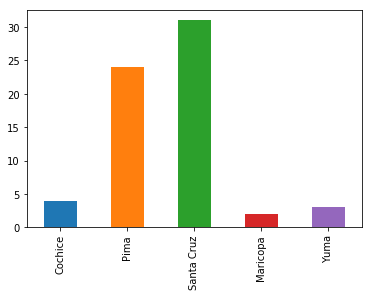

In [65]:
import matplotlib.pyplot as plt
% matplotlib inline

df3["reports"].plot.bar()

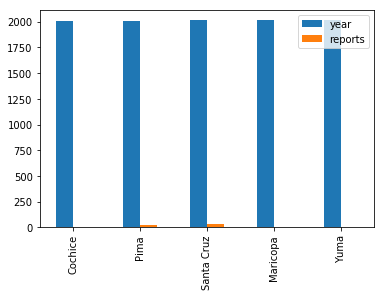

In [66]:
df3.plot.bar()

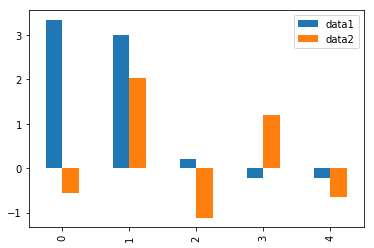

In [67]:
df2.plot.bar()

## Seaborn

### 核密度估计

单一变量的数值分布：平均分布，正态分布，偏态分布

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


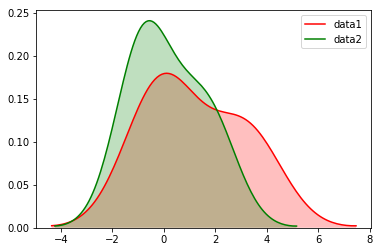

In [70]:
import seaborn as sns

sns.kdeplot(df2["data1"], shade=True, color="r")
sns.kdeplot(df2["data2"], shade=True, color="g")

In [71]:
x = np.random.rand(50)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


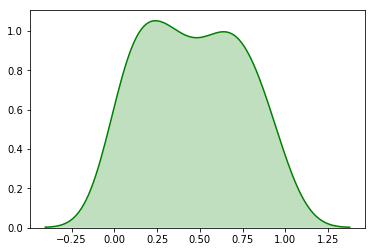

In [72]:
sns.kdeplot(x, shade=True, color="g")